**Import & reading the file**

In [1]:
#Prior: upload file into github, click on raw on the link

#import and read file

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv ('https://raw.githubusercontent.com/lilktmus/HFDataAnalytic/main/NYPD_Arrest_Data__Year_to_Date__20240501.csv')

**Exploring the Data**

In [2]:
#checking the data
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,1/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,1/2/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,1/3/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,1/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,1/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [3]:
#checking to see data types, total records, also null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

In [4]:
#checking unique values in data
df.nunique()

ARREST_KEY                  63621
ARREST_DATE                    91
PD_CD                         231
PD_DESC                       221
KY_CD                          66
OFNS_DESC                      62
LAW_CODE                      770
LAW_CAT_CD                      6
ARREST_BORO                     5
ARREST_PRECINCT                77
JURISDICTION_CODE              25
AGE_GROUP                       5
PERP_SEX                        2
PERP_RACE                       7
X_COORD_CD                  15785
Y_COORD_CD                  16393
Latitude                    17656
Longitude                   17625
New Georeferenced Column    17879
dtype: int64

In [5]:
#these are the columns I will be working with , will check on the quality of the data

df2 = df[['ARREST_BORO', 'PERP_SEX','OFNS_DESC']]


In [6]:
#checking data types
df2.dtypes

ARREST_BORO    object
PERP_SEX       object
OFNS_DESC      object
dtype: object

**Checking For Missing VAlues/ Null/ NA**

In [7]:
#double checking if any nan values in df2
df2.isnull().sum()

ARREST_BORO    0
PERP_SEX       0
OFNS_DESC      0
dtype: int64

In [8]:
#checking the unique records in 'offensive description' column  --- SPOTTED a Null
df2['OFNS_DESC'].drop_duplicates().sort_values()

8                                      (null)
370                       ADMINISTRATIVE CODE
21362                    ADMINISTRATIVE CODES
1133     AGRICULTURE & MRKTS LAW-UNCLASSIFIED
254            ALCOHOLIC BEVERAGE CONTROL LAW
                         ...                 
66                                 SEX CRIMES
2417                        THEFT OF SERVICES
3517                              THEFT-FRAUD
350             UNAUTHORIZED USE OF A VEHICLE
30                   VEHICLE AND TRAFFIC LAWS
Name: OFNS_DESC, Length: 62, dtype: object

In [9]:
#checking the unique records in 'borough' column
df2['ARREST_BORO'].drop_duplicates().sort_values()

3     B
1     K
0     M
2     Q
30    S
Name: ARREST_BORO, dtype: object

In [10]:
#checking the unique records in 'sex' column
df2['PERP_SEX'].drop_duplicates().sort_values()

2    F
0    M
Name: PERP_SEX, dtype: object

In [11]:
#creating df3 into dataframe
df3 = pd.DataFrame(df2)

**Cleaning up the Null**

In [12]:
# clean up null in the offense description column
missing_values = ['(null)']
df3 = pd.read_csv('https://raw.githubusercontent.com/lilktmus/HFDataAnalytic/main/NYPD_Arrest_Data__Year_to_Date__20240501.csv', na_values=missing_values)

In [13]:
#re-checking the unique records in 'offensive description' column  --- Ah! ha! i see a null in string  --- clean it up back in original df
df3['OFNS_DESC'].drop_duplicates().sort_values()

370                       ADMINISTRATIVE CODE
21362                    ADMINISTRATIVE CODES
1133     AGRICULTURE & MRKTS LAW-UNCLASSIFIED
254            ALCOHOLIC BEVERAGE CONTROL LAW
9135                    ANTICIPATORY OFFENSES
                         ...                 
2417                        THEFT OF SERVICES
3517                              THEFT-FRAUD
350             UNAUTHORIZED USE OF A VEHICLE
30                   VEHICLE AND TRAFFIC LAWS
8                                         NaN
Name: OFNS_DESC, Length: 62, dtype: object

**Filtering out Data for Stats**

In [14]:
#choosing the columns I will be working with into new dataframe

df4 = df3[['ARREST_BORO','PERP_SEX','OFNS_DESC']]

In [15]:
#rename the columns
df4 = df4.rename(columns={'ARREST_BORO': 'Boroughs', 'PERP_SEX': 'Sex', 'OFNS_DESC': 'Offenses'})

In [16]:
df4.head()

,Boroughs,Sex,Offenses
0,M,M,ROBBERY
1,K,M,RAPE
2,Q,F,ASSAULT 3 & RELATED OFFENSES
3,B,M,DANGEROUS DRUGS
4,K,F,FELONY ASSAULT


**Statistic Finding 1: finding the #1 common offense recorded**

In [17]:
#checking Total for all individual offense
df4['Offenses'].value_counts()

Offenses
ASSAULT 3 & RELATED OFFENSES    8960
PETIT LARCENY                   6526
FELONY ASSAULT                  5288
DANGEROUS DRUGS                 4733
MISCELLANEOUS PENAL LAW         3992
                                ... 
KIDNAPPING                         2
HOMICIDE-NEGLIGENT-VEHICLE         2
OFFENSES RELATED TO CHILDREN       2
ADMINISTRATIVE CODES               1
FORTUNE TELLING                    1
Name: count, Length: 61, dtype: int64

**Statistic Finding 2: finding the count of offenses committed per borough**

In [18]:
#checking Total for all individual offense
df9=df4['Boroughs'].value_counts()
df9

Boroughs
K    17402
M    15324
B    14221
Q    13782
S     2892
Name: count, dtype: int64

In [19]:
#filtering out the feature I will be working with : only looking at Assault 3
df4[df4['Offenses']== 'ASSAULT 3 & RELATED OFFENSES']

,Boroughs,Sex,Offenses
2,Q,F,ASSAULT 3 & RELATED OFFENSES
7,M,M,ASSAULT 3 & RELATED OFFENSES
15,M,F,ASSAULT 3 & RELATED OFFENSES
16,B,M,ASSAULT 3 & RELATED OFFENSES
19,M,F,ASSAULT 3 & RELATED OFFENSES
...,...,...,...
63577,Q,F,ASSAULT 3 & RELATED OFFENSES
63581,K,F,ASSAULT 3 & RELATED OFFENSES
63585,K,M,ASSAULT 3 & RELATED OFFENSES
63600,K,M,ASSAULT 3 & RELATED OFFENSES


**Statistic Finding 3: finding the count of 3rd degree assault,committed per borough**

In [20]:
#checking Total count for just 3rd degree assault
df10 = df4.groupby('Boroughs')['Offenses'].agg(lambda x: (x == 'ASSAULT 3 & RELATED OFFENSES').sum())
df10

Boroughs
B    2300
K    2533
M    1760
Q    2025
S     342
Name: Offenses, dtype: int64

In [21]:
# Convert the 'Offenses' column to numeric -- For graphing and Stats (it was Object before, changing it to cateogory)
df4['Offenses'] = df4['Offenses'].astype('category').cat.codes

df4.head(5)

,Boroughs,Sex,Offenses
0,M,M,55
1,K,M,54
2,Q,F,6
3,B,M,13
4,K,F,19


**Statistics Findings 4: finding the overall mean for 3rd assault offense amongst entire recorded population then by genders**

In [22]:
#Stats 1: (individual boroughs means, group by gender )

# Convert the 'Offenses' column to numeric -- For graphing and Stats (it was Object before, changing it to cateogory)
df4['Offenses'] = df4['Offenses'].astype('category').cat.codes

# Group by 'Boroughs', 'Sex' and calculate the mean of 'Offenses'
df5 = df4.groupby(['Boroughs', 'Sex'])['Offenses'].mean().reset_index()

# Rename the column 'Offenses' to 'Mean'
df5.columns = ['Boroughs', 'Sex', 'Mean']

df5 = df5.sort_values('Boroughs') # Sort the DataFrame by 'Borough'
df5

# Convert the 'Offenses' column to numeric --(result shows float dtypes when pulling Mean result, changing it to int -- cleaner)
df5['Mean'].dtype
df5['Mean'] = df5['Mean'].astype(int)

df5

,Boroughs,Sex,Mean
0,B,F,27
1,B,M,32
2,K,F,27
3,K,M,31
4,M,F,28
5,M,M,31
6,Q,F,28
7,Q,M,31
8,S,F,33
9,S,M,33


In [23]:
#Stats 2: (all boroughs Mean)

# Group by 'Boroughs', 'Sex' and calculate the mean of 'Offenses'
df6 = df4.groupby(['Boroughs'])['Offenses'].mean().reset_index()

# Rename the column 'Offenses' to 'Mean'
df6.columns = ['Boroughs','Mean']

# Convert the 'Offenses' column to numeric --(result shows float dtypes when pulling Mean result, changing it to int -- cleaner)
df6['Mean'].dtype
df6['Mean'] = df6['Mean'].astype(int)

df6

,Boroughs,Mean
0,B,31
1,K,30
2,M,31
3,Q,31
4,S,33


In [24]:
#Stats 3: (all boroughs but only Females Mean)

# Group by 'Boroughs', 'Sex' and calculate the mean of 'Offenses'
df7 = df4.loc[df4['Sex'] == 'F'].groupby('Boroughs')['Offenses'].mean().reset_index()


# Rename the column 'Offenses' to 'Mean'
df7.columns = ['Boroughs','Mean']

# Convert the 'Offenses' column to numeric --(result shows float dtypes when pulling Mean result, changing it to int -- cleaner)
df7['Mean'].dtype
df7['Mean'] = df7['Mean'].astype(int)

df7

,Boroughs,Mean
0,B,27
1,K,27
2,M,28
3,Q,28
4,S,33


In [25]:
#Stats 4: (all boroughs but only Male Mean)

# Group by 'Boroughs', 'Sex' and calculate the mean of 'Offenses'
df8 = df4.loc[df4['Sex'] == 'M'].groupby('Boroughs')['Offenses'].mean().reset_index()


# Rename the column 'Offenses' to 'Mean'
df8.columns = ['Boroughs','Mean']

# Convert the 'Offenses' column to numeric --(result shows float dtypes when pulling Mean result, changing it to int -- cleaner)
df8['Mean'].dtype
df8['Mean'] = df8['Mean'].astype(int)

df8

,Boroughs,Mean
0,B,32
1,K,31
2,M,31
3,Q,31
4,S,33


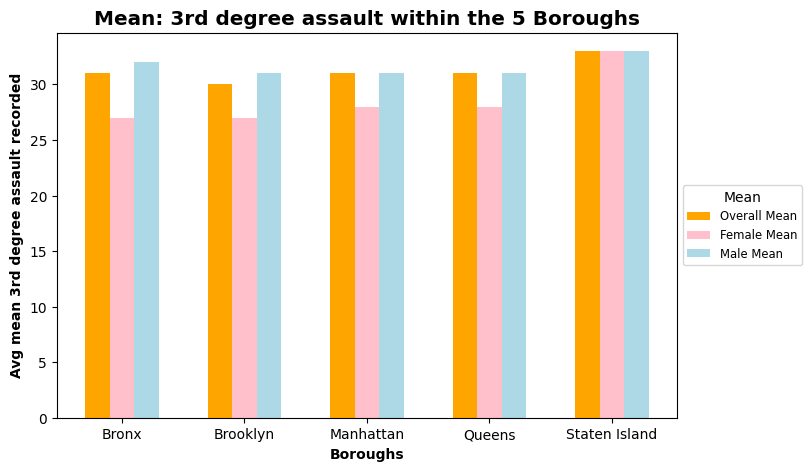

In [34]:
#Chart 1: combining the 3 Mean into 1 comparison chart
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
X = np.array(['Bronx','Brooklyn','Manhattan', 'Queens', 'Staten Island'])
df6 = [31,30,31, 31,33]  #overall
df7 =[27,27,28, 28,33]   #female
df8 =[32,31,31, 31,33]   #male

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.20, df6, 0.2, color='orange', label='Overall Mean')
plt.bar(X_axis, df7, 0.2, color='pink', label='Female Mean')
plt.bar(X_axis + 0.20, df8, 0.2, color='lightblue', label='Male Mean')

plt.xticks(X_axis, X)
plt.xlabel("Boroughs", fontdict={'fontweight': 'bold', 'size': 'medium'})
plt.ylabel("Avg mean 3rd degree assault recorded", fontdict={'fontweight': 'bold', 'size': 'medium'})
plt.title("Mean: 3rd degree assault within the 5 Boroughs", fontdict={'fontweight': 'bold', 'size': 'x-large'})
plt.legend(title='Mean', loc='center left', bbox_to_anchor=(1,.5), fontsize='small')
plt.show()

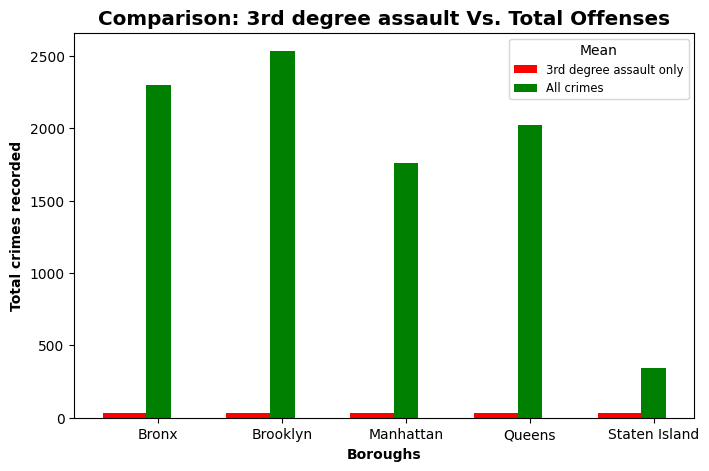

In [44]:
#Chart 2: combining the count of 3rd degree assault into 1 comparison chart
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
X = np.array(['Bronx','Brooklyn','Manhattan', 'Queens', 'Staten Island'])
df9 = [14221, 17402,15324, 13782, 2892]  #overall
df10 =[2300, 2533, 1760, 2025, 342]   #only 3rd degree assault


X_axis = np.arange(len(X))
plt.bar(X_axis - 0.20, df6, 0.5, color='Red', label='3rd degree assault only')
plt.bar(X_axis, df10, 0.2, color='green', label='All crimes')


plt.xticks(X_axis, X)
plt.xlabel("Boroughs", fontdict={'fontweight': 'bold', 'size': 'medium'})
plt.ylabel("Total crimes recorded", fontdict={'fontweight': 'bold', 'size': 'medium'})
plt.title("Comparison: 3rd degree assault Vs. Total Offenses", fontdict={'fontweight': 'bold', 'size': 'x-large'})
plt.legend(title='Mean', loc='upper right', fontsize='small')
plt.show()

**Observation**

In all boroughs, 3rd degree assault is the #1 recorded offense, at 8960 records. (*see: statistic finding 1*)
When comparing the female and male offenders in the 3rd degree assault, the Mean for male population ranks higher in all boroughs except Staten Island. While Females has a lower mean in all boroughs except Staten Island, where it is equal to male offenders.


The bias in the dataset is the representative for all boroughs are not represented fairly. In the overall count of offenses recorded for each borough, Staten Island shows less than 3000 records, while Brooklyn shows a record of 17,000 +. (*see: statistic finding 2*) Based on the chart 1, it would look like Staten Island has a higher mean for offenses commited in the 3rd degree assault but in reality, the count of offenders in Staten Island is lower than all boroughs and the mean is skewed higher amongst all other borough due to the representation size.  (*see: statistic finding 3 & chart 2*)

To avoid bias, it would be best to choose a ratio for each boroughs to avoid bias.
